In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

df['ChurnFlag'] = df['Churn'].map({'Yes':1,'No':0})

print("✅ Dataset ready for EDA")


✅ Dataset ready for EDA


In [7]:
churn_rate = df['ChurnFlag'].mean()
print(f"Overall Churn Rate: {churn_rate*100:.2f}%")


Overall Churn Rate: 26.54%


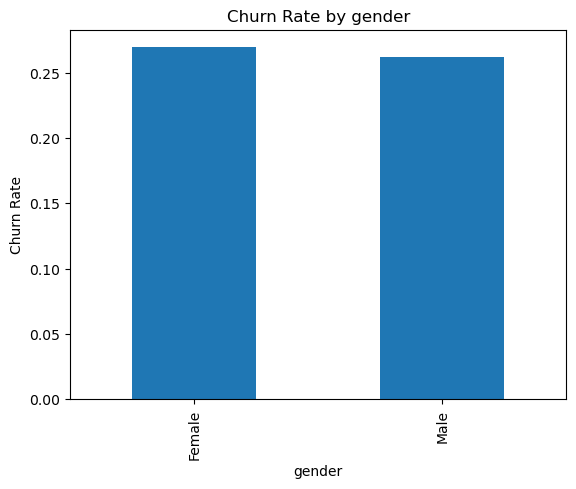

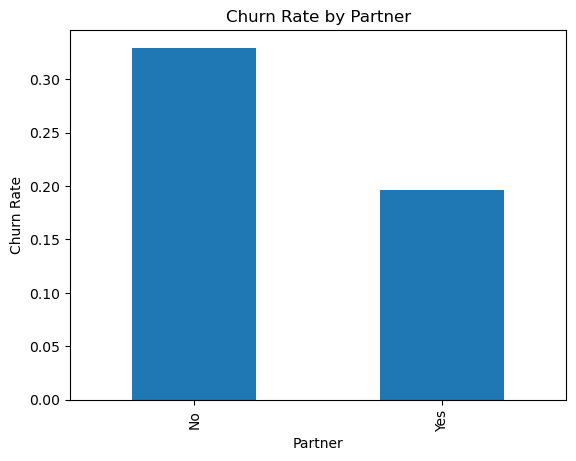

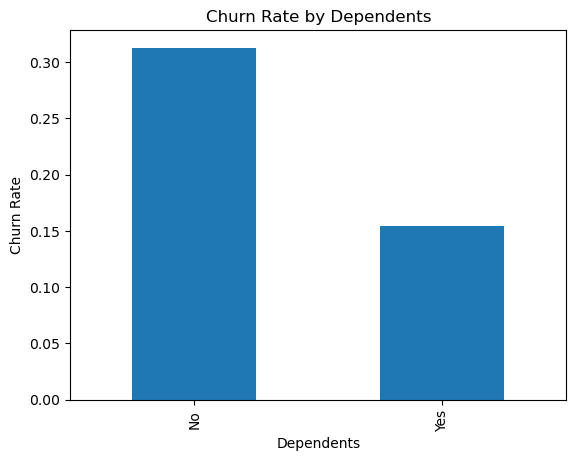

In [8]:
import matplotlib.pyplot as plt

for col in ['gender','Partner','Dependents']:
    churn_counts = df.groupby(col)['ChurnFlag'].mean()
    churn_counts.plot(kind='bar', title=f"Churn Rate by {col}", ylabel="Churn Rate")
    plt.show()


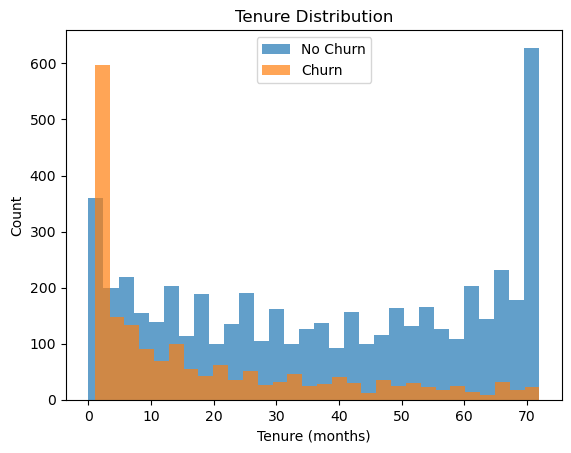

In [9]:
plt.hist(df[df['ChurnFlag']==0]['tenure'], bins=30, alpha=0.7, label="No Churn")
plt.hist(df[df['ChurnFlag']==1]['tenure'], bins=30, alpha=0.7, label="Churn")
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.legend()
plt.show()


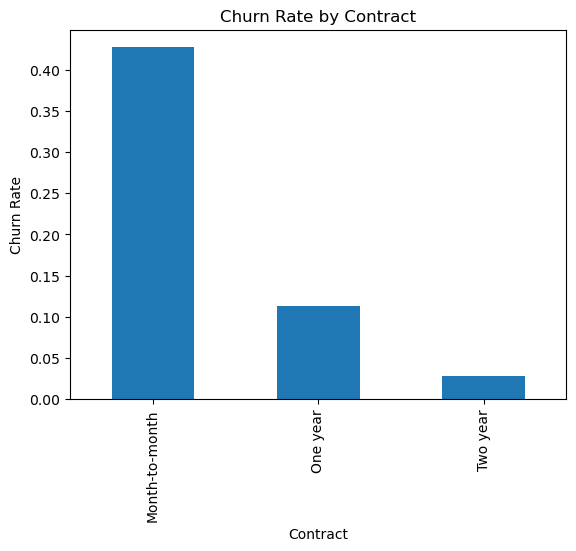

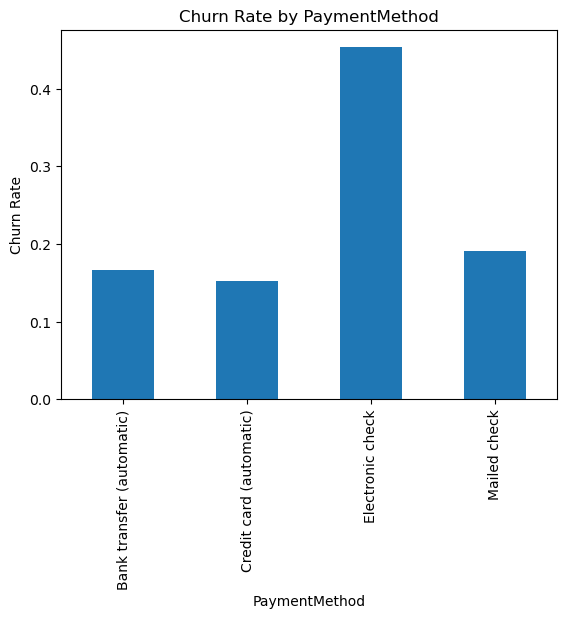

In [10]:
for col in ['Contract','PaymentMethod']:
    churn_rate = df.groupby(col)['ChurnFlag'].mean()
    churn_rate.plot(kind='bar', title=f"Churn Rate by {col}", ylabel="Churn Rate")
    plt.show()
